# Problem 1
In our first example we are looking at the temperature reading (meta-data) associated with an experiment. For the experiment to work reliably, the temperature should be at around 12 Kelvin, and if we look at the data it is mostly consistent with 12 Kelvin to within the 0.4 degree precision of the thermometry and the thermal control system (standard deviation). However, there are times when the thermal control system misbehaved and the temperature was not near 12 K, and in addition there are various glitches in the thermometry that give anomalously high and low readings (the reading does not match the real temperature). We definitely want to identify and throw out all the data when the thermal control system was not working (and the temperature was truly off from nominal). While it is possible to have an error in the thermometry such that the true temperature was fine, and we just had a wonky reading, in an abundance of caution we want to throw those values out too.

In [5]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

To make this a bit concrete, we will simulate a little data. Start by simulating 100k 'good' data points assuming Gaussian fluctations, and because we are playing god adding the following 'bad' datapoints: {10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7}

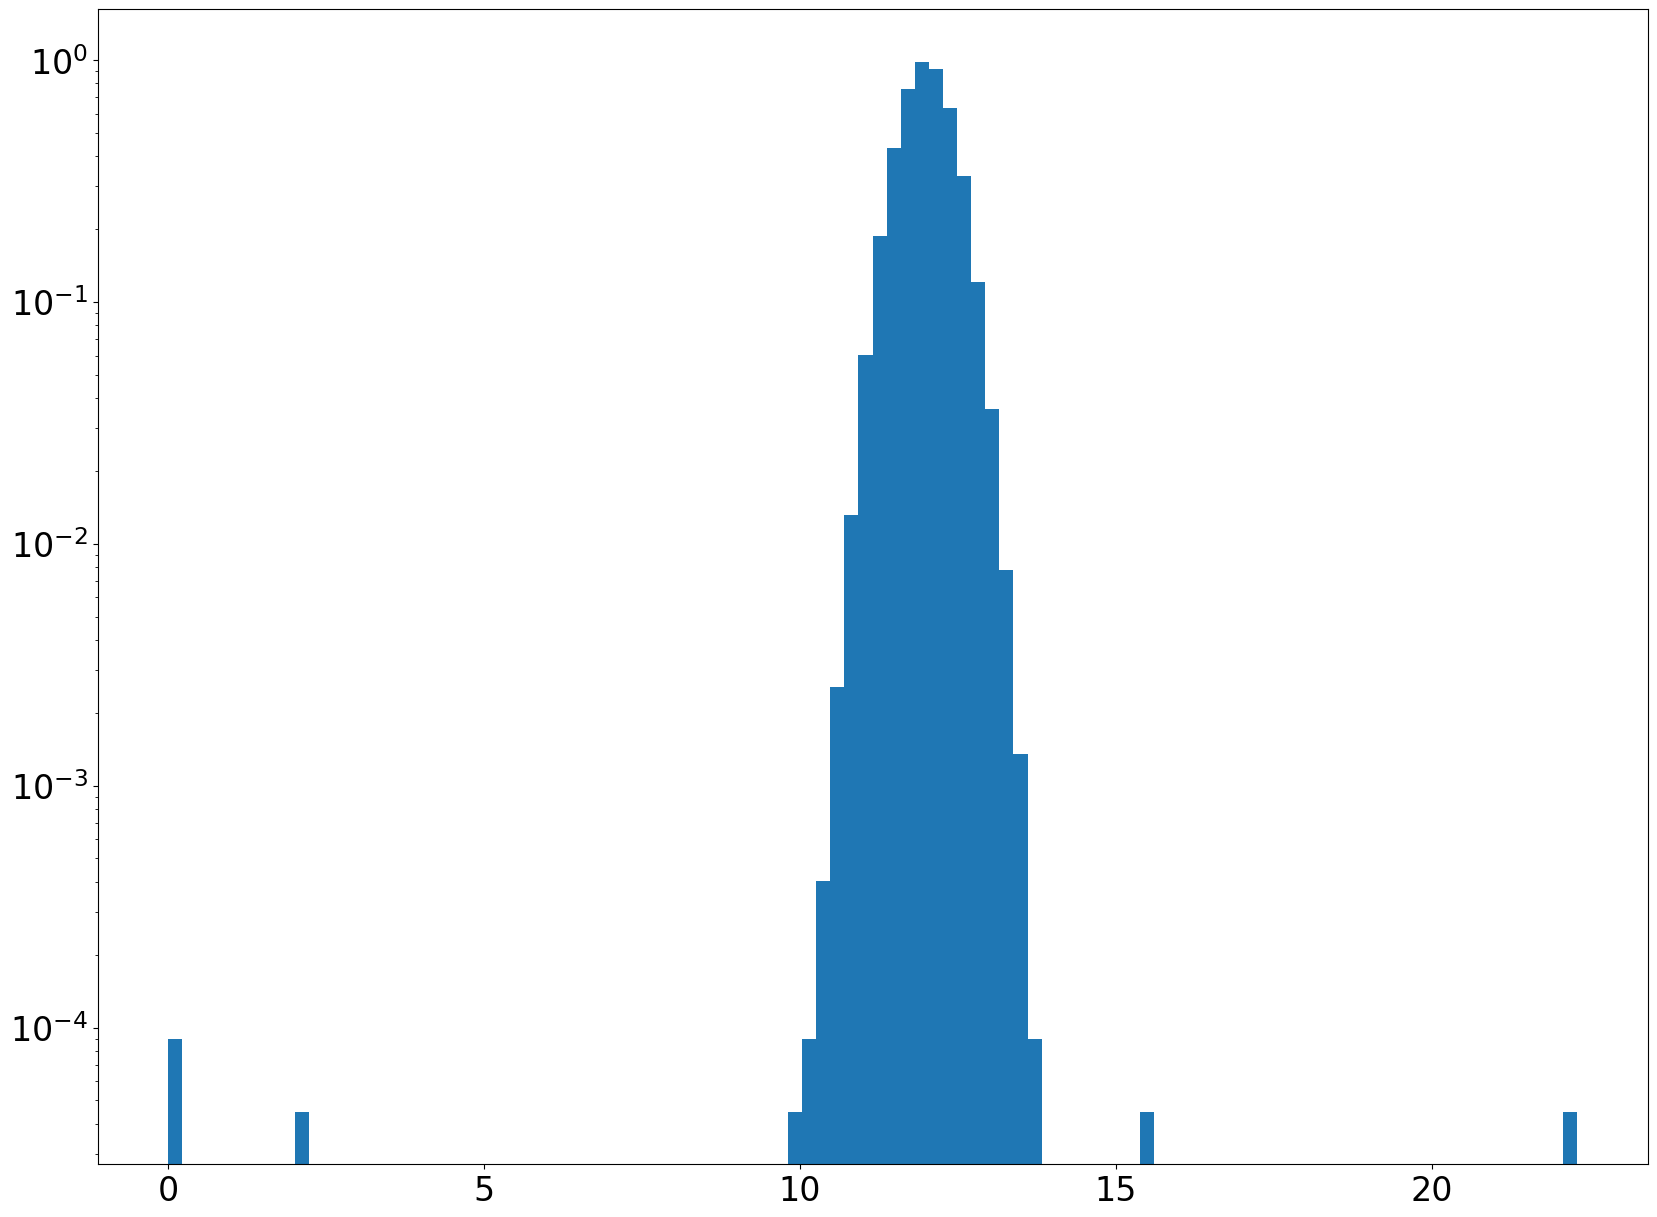

In [6]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()


A) So our goal is to identify bad data and throw it out.

Start by exploring the data you have created with appropriate plots
State the statistical question in words. Be very clear, and describe why you have chosen this statistical question.
Restate your question in math. Be very clear.
Apply your statistical test and construct a truth table.

We need to first define 'bad' data, turn that into a statistical question, it would be which data points should we throw out because of the low chance of occuring? Lets first try data points that's 1 $\sigma$, 3 $\sigma$ and 5 $\sigma$ away from the mean and see how much data points will be thrown out.

Question in math: Integrating under the normal distribution pdf, which data points have probability that's less than 1,3,5 $\sigma$?

Starting with statistical threshold of 1$\sigma$, we will remove values that have sigma value greater than 1:

In [11]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
i = 0
removed_values = []
while i < len(d):
    if d[i] >= 12.0:
        prob = 1 - stats.norm.cdf(d[i], 12, 0.4)
    elif d[i] < 12.0:
        prob = stats.norm.cdf(d[i], 12, 0.4)
    sigma = stats.norm.ppf(prob)
    if abs(sigma) > 1:
        removed_values.append(d[i])
        d = np.delete(d, i)
        i-=1
    i+=1
print('Value thrown out: ' + str(len(removed_values)))
print('Min value thrown out, max value thrown out: '+ str(min(d)) + ', ' + str(max(d)))

Value thrown out: 31686
Min value thrown out, max value thrown out: 11.600004612106623, 12.399963593171833


Now we do 3$\sigma$:

In [10]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
i = 0
removed_values = []
while i < len(d):
    if d[i] >= 12.0:
        prob = 1 - stats.norm.cdf(d[i], 12, 0.4)
    elif d[i] < 12.0:
        prob = stats.norm.cdf(d[i], 12, 0.4)
    sigma = stats.norm.ppf(prob)
    if abs(sigma) > 3:
        removed_values.append(d[i])
        d = np.delete(d, i)
        i-=1
    i+=1
print('Value thrown out: ' + str(len(removed_values)))
print('Min value thrown out, max value thrown out: '+ str(min(d)) + ', ' + str(max(d)))

Value thrown out: 299
Min value thrown out, max value thrown out: 10.80002645427143, 13.198428995311769


Finally we do 5$\sigma$:

In [9]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
i = 0
removed_values = []
while i < len(d):
    if d[i] >= 12.0:
        prob = 1 - stats.norm.cdf(d[i], 12, 0.4)
    elif d[i] < 12.0:
        prob = stats.norm.cdf(d[i], 12, 0.4)
    sigma = stats.norm.ppf(prob)
    if abs(sigma) > 5:
        removed_values.append(d[i])
        d = np.delete(d, i)
        i-=1
    i+=1
print('Value thrown out: ' + str(len(removed_values)))
print('Min value thrown out, max value thrown out: '+ str(min(d)) + ', ' + str(max(d)))

Value thrown out: 6
Min value thrown out, max value thrown out: 10.3, 13.74632694669945


With the number we got from testing each $\sigma$ value, we can construct three truth table.

Truth table for 3 $\sigma$:

|      | True T | Bad T     |
| ---        |    ----   |          --- |
| Test good     |    99701    |  0  |
| Test bad   |     291    |   8   |

Truth table for 1 $\sigma$:

|      | True T | Bad T     |
| ---        |    ----   |          --- |
| Test good     |    68314    |  1  |
| Test bad   |     31679    |   7   |

Truth table for 5 $\sigma$:

|      | True T | Bad T     |
| ---        |    ----   |          --- |
| Test good     |   99998    |  2  |
| Test bad   |     2    |   6   |

When we increase the number of sigma value, the number of commissions also increases, both 'good' and 'bad' numbers. Vice versa, if I decrease the number of sigma value the number of omission increases. As we can see from the truth table the number of total omission is somewhat predictable when we look at 68-95-99.7 rule.

Mistakes of commission happens at thresholds 3$\sigma$ and 5$\sigma$, the number of bad commissions increases as we increase the threshold. Committing entirely 'good' data but not bad data is not possible for this dataset.

From the results we got we can conclude that there are tradeoffs between 'good' data commissions and 'bad' data commissions. Increasing threshold increases number of good 

# Problem 2
In this example we will be looking for asteroids. If we look at the alignment of stars on subsequent images, they don't perfectly align due to atmospheric and instrumental effects (even ignoring proper motion). The resulting distribution is two dimensional, and for this lab let's assume it is a 2D Gaussian with 1 arcsecond RMS. Or said another way, if I histogram how far all the (stationary) stars appear to have moved I get something like:

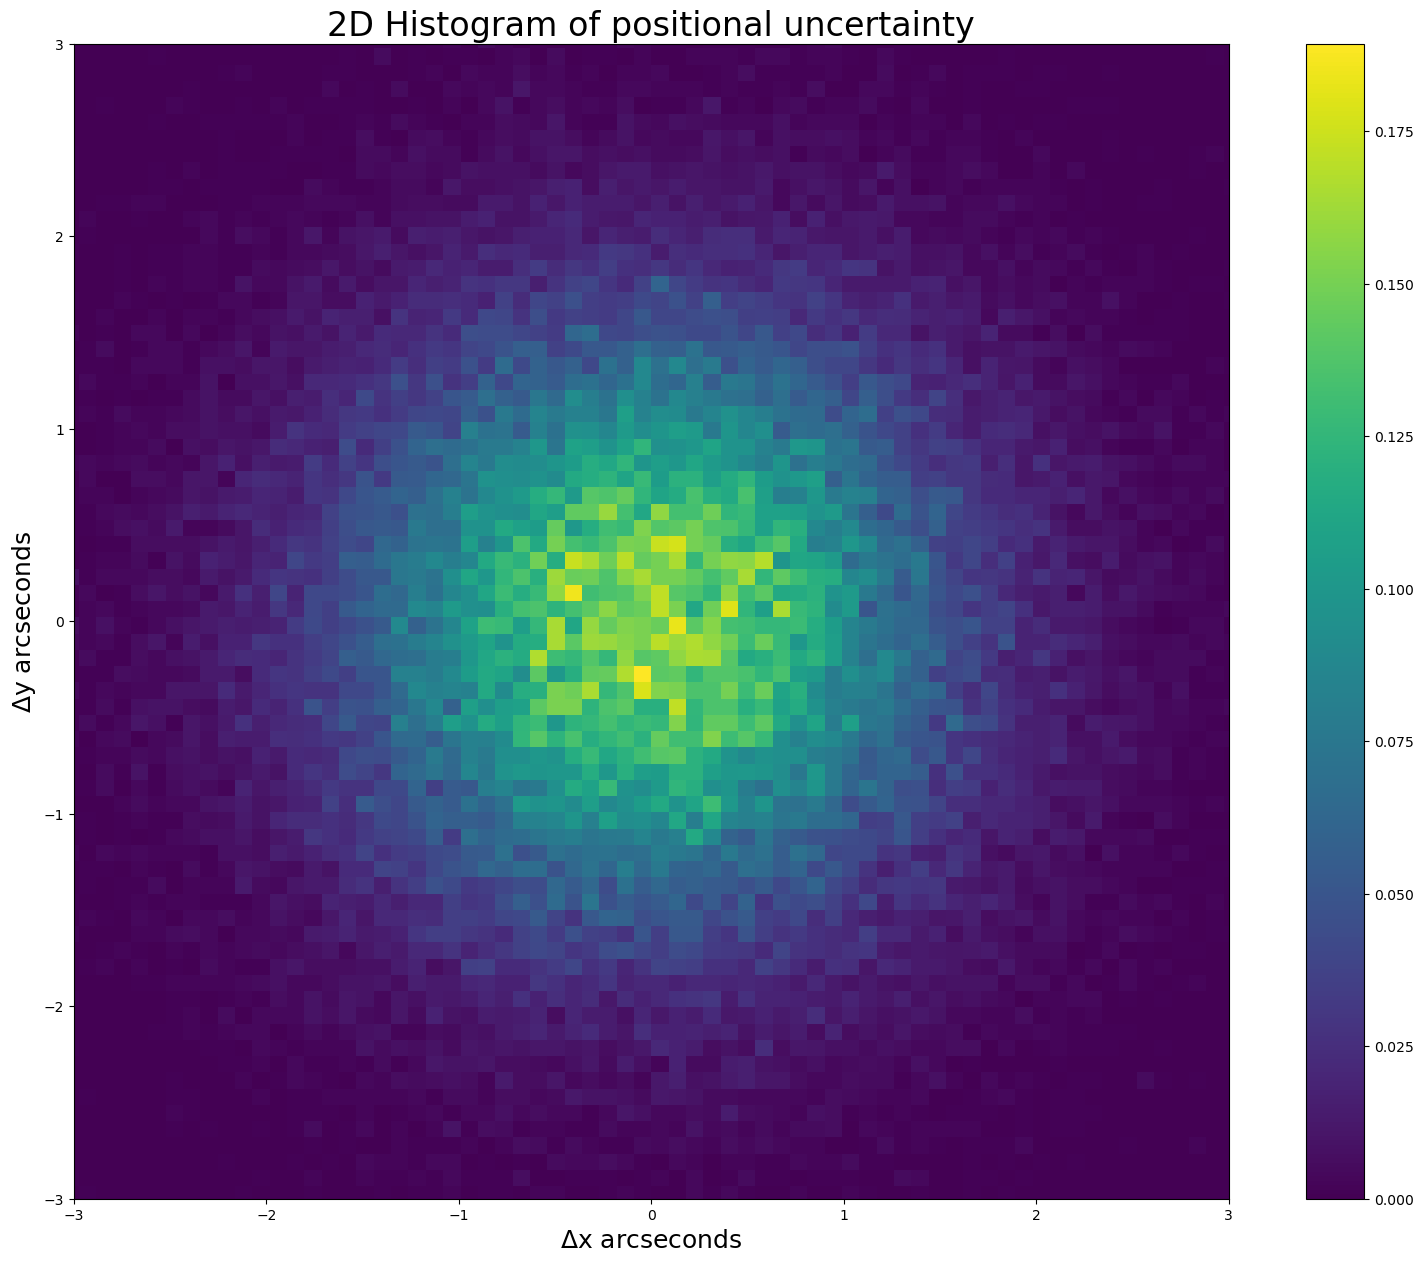

In [27]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

If I have a potential asteroid, it will have some true movement between the images. We would like a '5 sigma' detection of movement. What is that distance in arcseconds?

1. What is the question in words?
2. What is the question in math? [Hint: Come up with an analytic description of your pdf(). The Blue Book may be helpful here.]
3. What distance in arcseconds represents a 5 sigma detection of motion?

Question in words: To find the threshold of how far an object needs to move before we can consider it an asteriod with 5 sigma confidence, we ask what's the distance away from the origin at which the 2D Gaussian background produce a position measurement that has a significance of 5 sigma?

Question in math: What pdf describes the background in distance and what value of that background corresponds to a probability of 5 sigma?

Now let's find the distance in arcseconds representing 5 sigma detection of motion.

First we plot the analytic pdf of our distribution.

Text(0, 0.5, 'Probability')

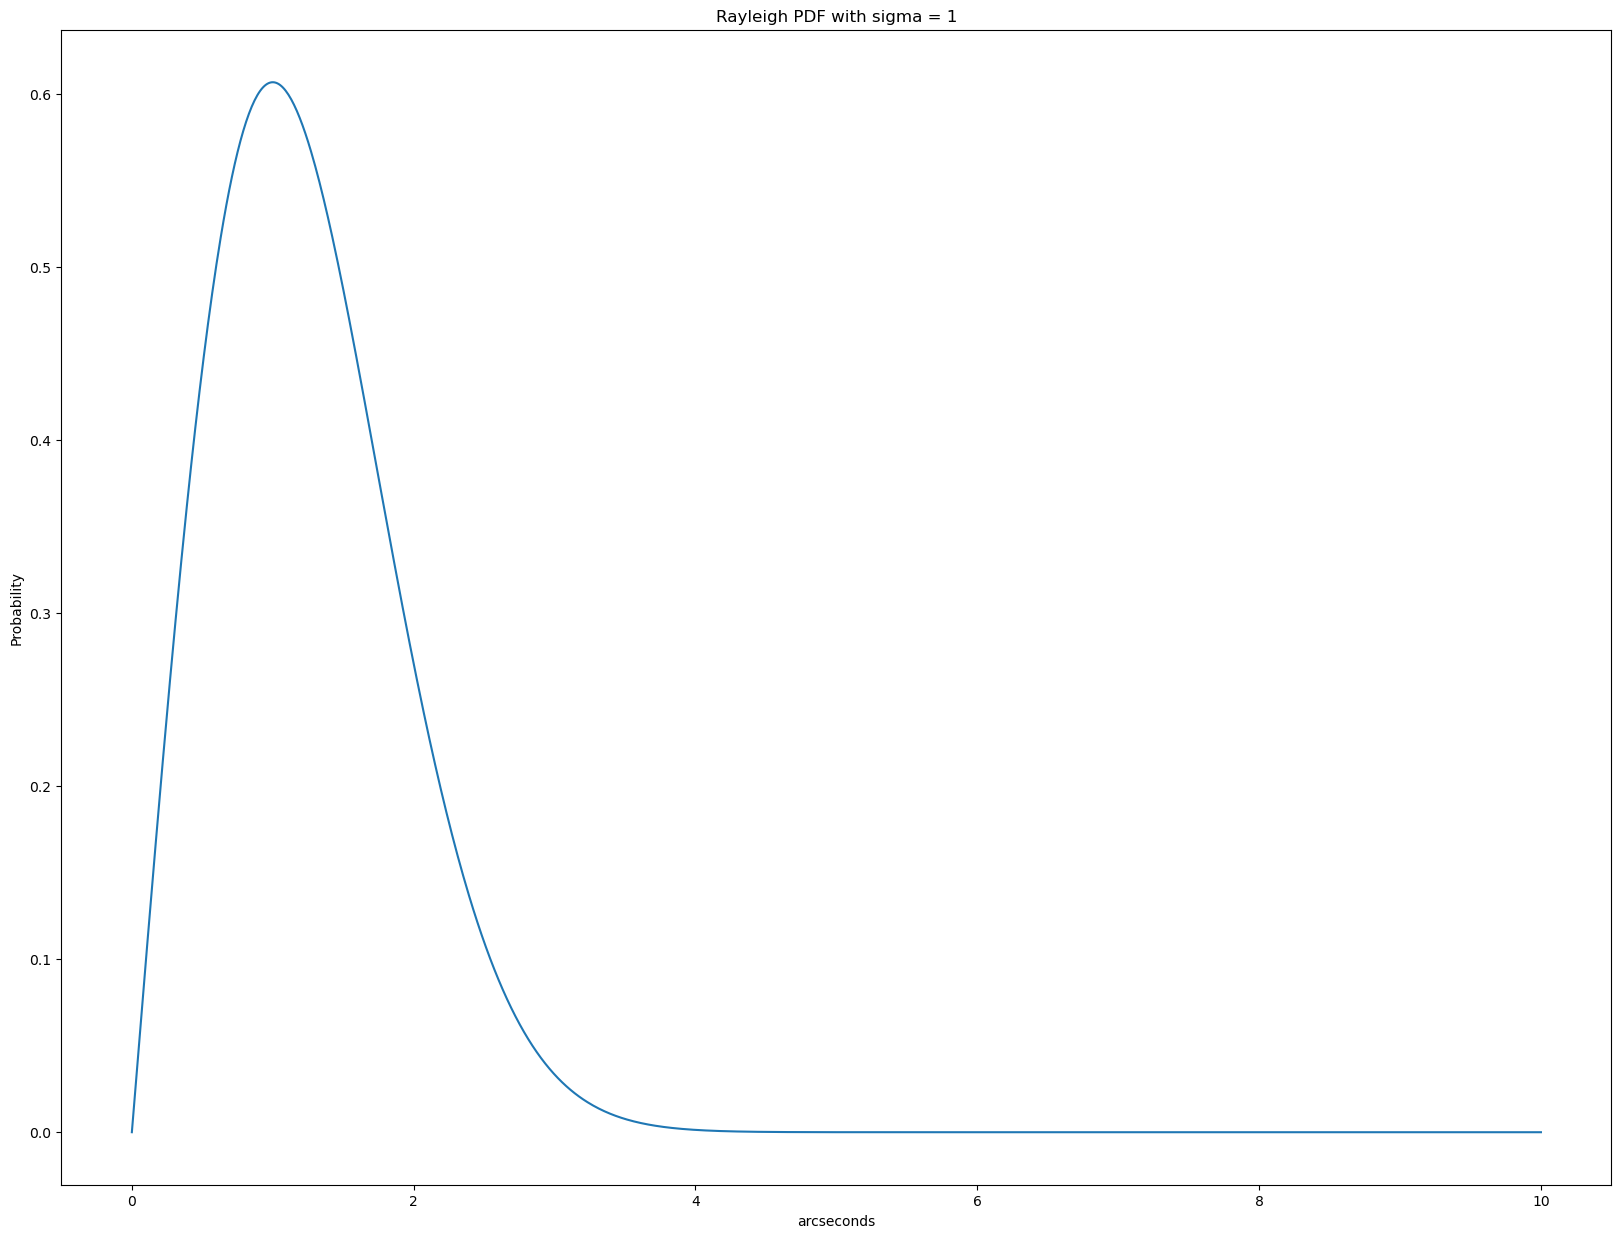

In [32]:
x = np.linspace(0, 10, 1000)
dist = stats.rayleigh.pdf(x, scale = 1)

plt.plot(x,dist)
plt.title("Rayleigh PDF with sigma = 1")
plt.xlabel("arcseconds")
plt.ylabel("Probability")

From the graph we could estimate the value of 5 sigma is very small, and we already know the corresponding value to 5 sigma from last week's lab.

In [36]:
prob5Sig = 1/3.5e6
integral = 1 - prob5Sig # integral to the left
integral

0.9999997142857143

In [37]:
stats.rayleigh.ppf(integral)

5.489676406965609

Therefore distance of 5.489 arcseconds corresponds to 5 sigma detection of motion.

# Problem 3
As we discussed in class, one of the key backgrounds for gamma-ray telescopes are cosmic rays. Cosmic rays are charged particles—usually protons or electrons but can include atomic nuclei such a alpha particles (helium) or iron. Because of their charge cosmic rays spiral in the magnetic field of the galaxy. From the perspective of the Earth they appear to be coming uniformly from all directions like a high energy gas, and the direction the cosmic ray is travelling when it reaches the Earth tells us nothing about where it came from because we don't know what tortured path it has taken through the galaxy to reach us. However, at trillion electron volt energies and above, the spiral loops are fairly big and the sun and the moon will block cosmic rays. This means the sun and the moon appear as holes in the cosmic ray sky (cosmic rays from that direction are absorbed).

Assume in a moon sized patch on the sky we normally have a cosmic ray rate of 1 cosmic ray per minute (arrivals are random in time). If we can observe where the moon is for 8 hours per night (not too close to the horizon) and we observe for 15 days and see 6800 cosmic rays, what is the signficance of our moon shadow detection?


What is the question in words?
If we observe for 8 hours per night over 15 days, what is the probability of measuring 6800 cosmic rays?

Translate the question to math, describing both the expected background pdf() and the integral you need to do.

The background distribution, which is a poisson distribution with an expected value of 1 cosmic ray per minute. Over 8 hours period, this is the same as a poisson distribution with expected value of 8*60 = 480 cosmic rays. To get the probability of finding 6800 over 15 days, we sum the poisson with mu = 480 over 15 days, then integrate from 0 to 6800, and we will get the probability. Also note 480 * 15 = 7200.

Text(0, 0.5, 'Probability')

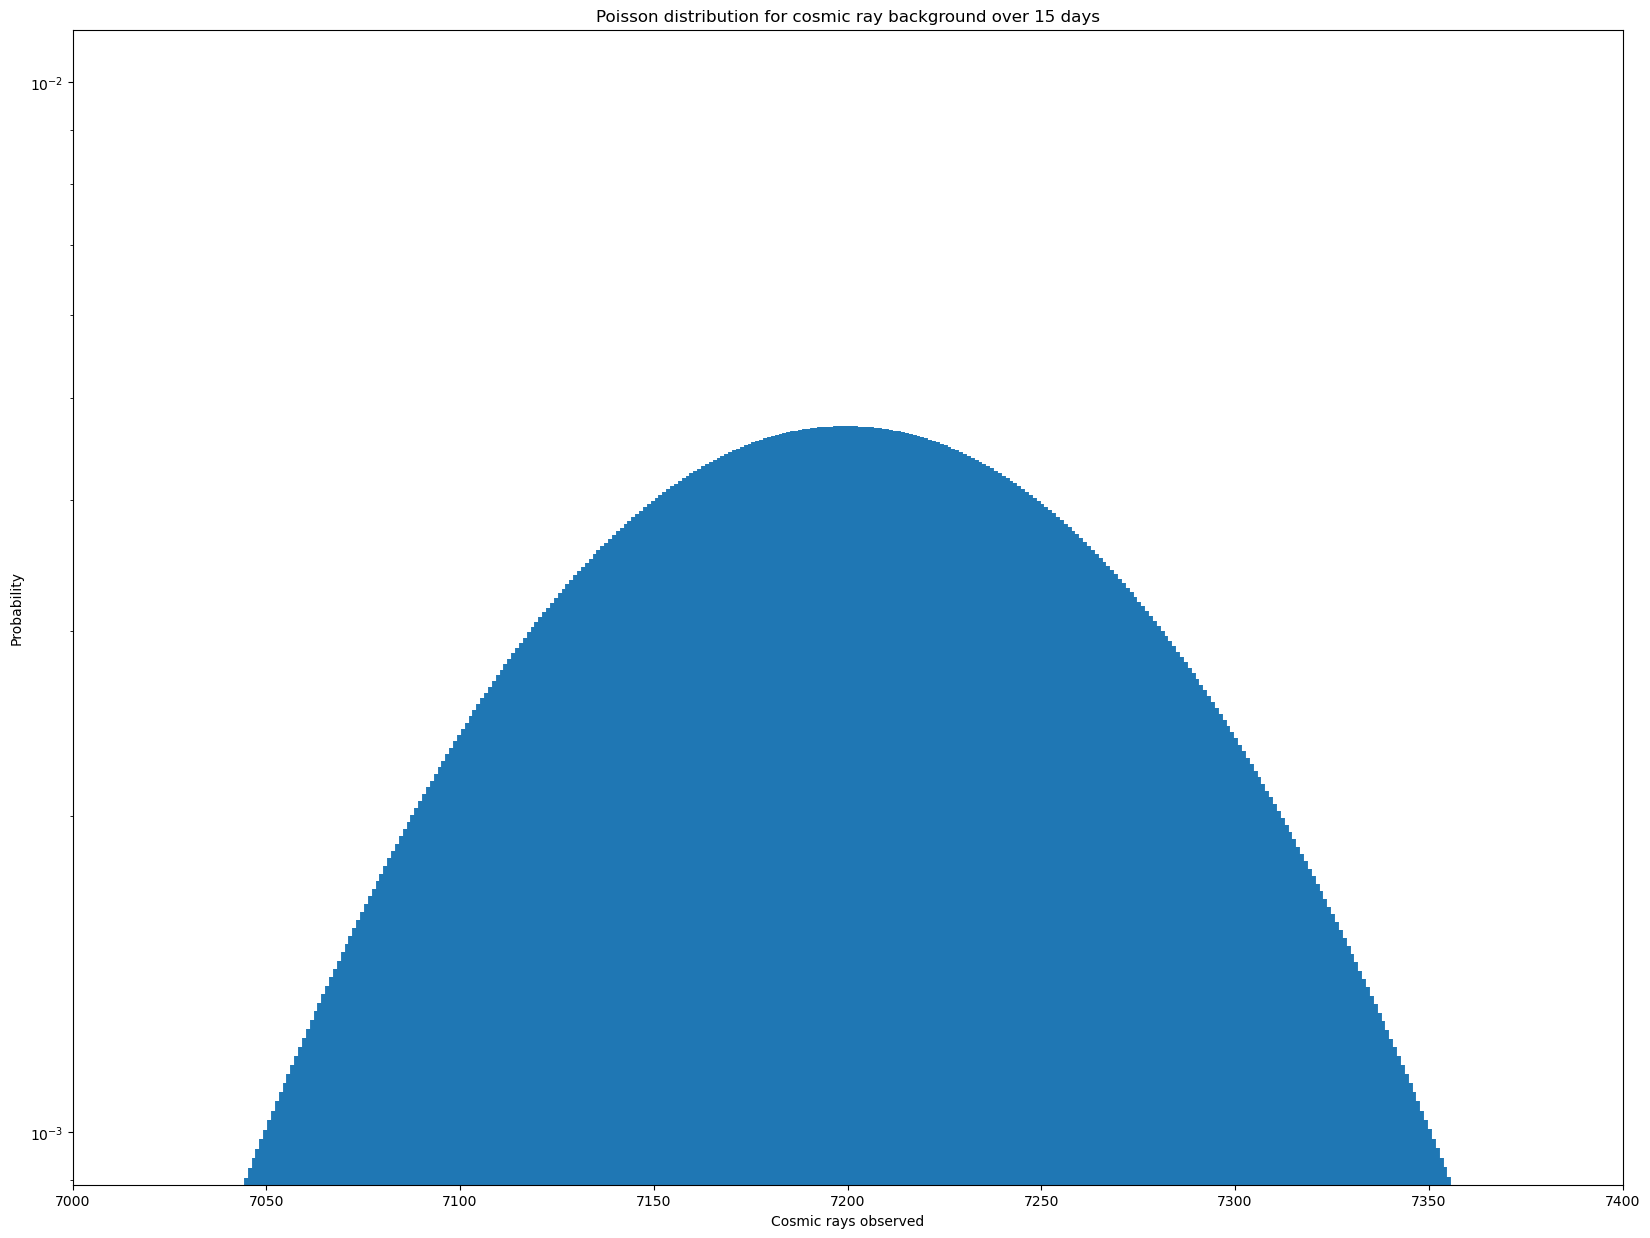

In [33]:
dist = stats.poisson(7200)
x = np.arange(6400,8000)
pmf = dist.pmf(x)

plt.vlines(x,0,pmf,linewidth = 10)
plt.yscale("log")
plt.xlim(7000,7400)
plt.title("Poisson distribution for cosmic ray background over 15 days")
plt.xlabel("Cosmic rays observed")
plt.ylabel("Probability")

In [11]:
prob = stats.poisson.cdf(6800,7200)

In [12]:
sigma = stats.norm.ppf(prob)
sigma

-4.750747965777188

The significance of our moon shadow detection is -4.7507 sigmas, the minus sign only means that the value is to the left of the mean. This result is expected given the context of the problem. Moon blocks cosmic rays, so this big drop in values due to background interference is expected. As the significance level failed to reach 5-sigma, therefore it's not significant enough to be called as a discovery.